In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from model.dmogpe import DeepMixtureGPE

### Motorcycle

In [5]:
# Import data, then scale and split into train/test
data = np.loadtxt('data/motorcycle.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

# Randomly split into train (80%) and test (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Number of clusters is 6


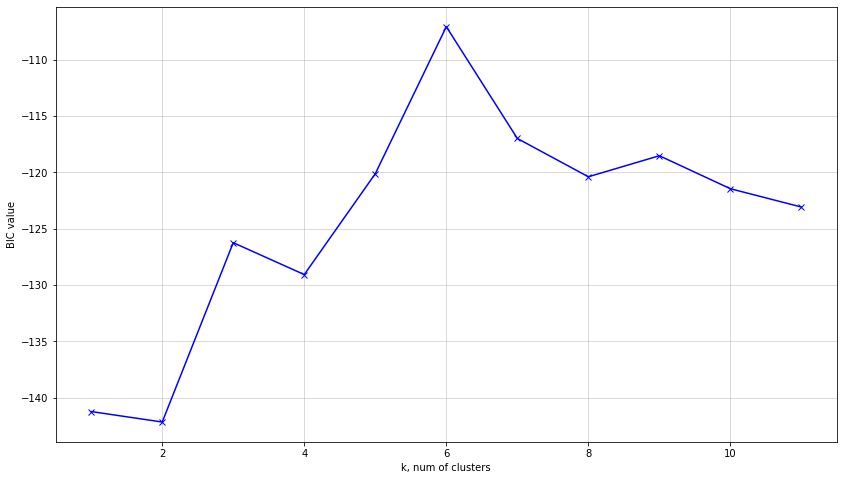

In [6]:
DeepMixtureGPE.estimate_n_experts(np.concatenate((X_train,y_train), axis=1), criterion='BIC', random_state=11)

In [19]:
m = DeepMixtureGPE(n_experts=6, sparse_gp=False, fix_ind_pnts=True, initial_clustering='GMM', random_state=11)

In [20]:
m.fit(X_train, y_train, mode='CCR', verbose=0)

Optimization restart 1/2, f = 23.169291221423826
Optimization restart 2/2, f = 23.169291221566688
Optimization restart 1/2, f = 19.865140109616057
Optimization restart 2/2, f = 19.865139523944503
Optimization restart 1/2, f = 14.189385539292907
Optimization restart 2/2, f = 14.189385401213874
Optimization restart 1/2, f = 24.236605992763568
Optimization restart 2/2, f = 24.2366059916474
Optimization restart 1/2, f = 29.8554944181001
Optimization restart 2/2, f = 29.855494418064737
Optimization restart 1/2, f = 24.121955115583134
Optimization restart 2/2, f = 24.12196415899008


In [21]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 76.89 %. Soft_pred: 76.96 %.
RMSE. Hard_pred: 0.2001. Soft_pred: 0.1997.


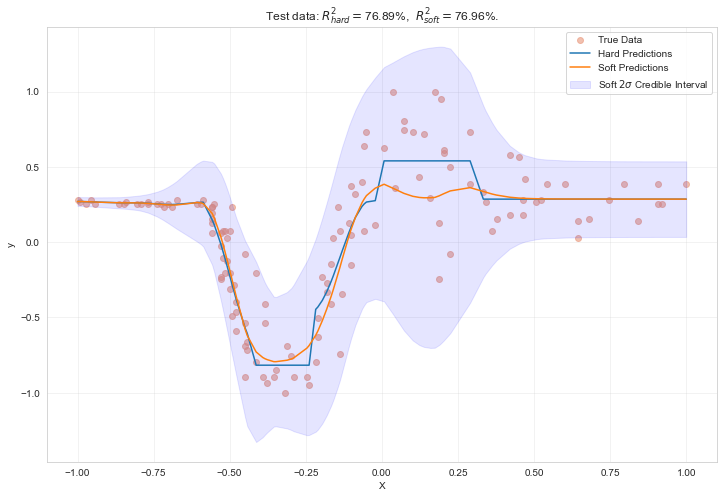

In [22]:
m.plot(X,y,X_test,y_test)

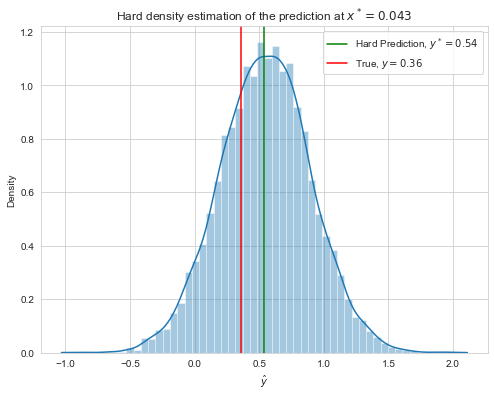

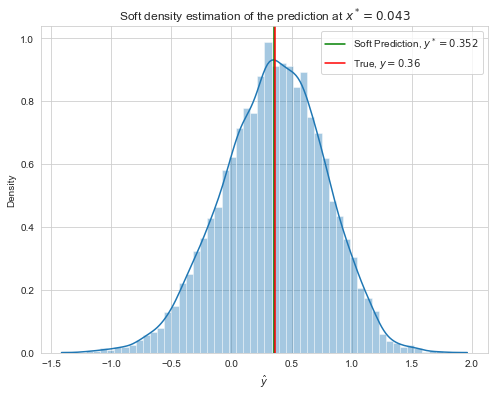

In [50]:
pnt = np.random.randint(low=0,high=X.shape[0])
m.estimate_density_hard(X[pnt],y=y[pnt])
m.estimate_density_soft(X[pnt],y=y[pnt])

### NASA

In [51]:
# Import data, then scale and split into train/test
data = np.loadtxt('data/nasa.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

# Randomly split into train (80%) and test (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [52]:
m = DeepMixtureGPE(n_experts=5, sparse_gp=False, fix_ind_pnts=True, random_state=11)

In [53]:
m.fit(X_train, y_train, n_iterations=3, mode='CCR-MM', verbose=0)

  0%|          | 0/3 [00:00<?, ?it/s]

Optimization restart 1/2, f = 520.4543838911361
Optimization restart 2/2, f = 520.4543839087783
Optimization restart 1/2, f = -225.8754308147655
Optimization restart 2/2, f = -225.87543081475997
Optimization restart 1/2, f = -610.6538776086628
Optimization restart 2/2, f = -610.6538776207149
Optimization restart 1/2, f = -87.13695869322635
Optimization restart 2/2, f = -87.13695869345966
Optimization restart 1/2, f = -2167.920431927833
Optimization restart 2/2, f = -2167.9204319231826


 33%|███▎      | 1/3 [00:20<00:40, 20.46s/it]

Optimization restart 1/2, f = 305.4667508523644
Optimization restart 2/2, f = 305.4667508513762
Optimization restart 1/2, f = -222.22989634787876
Optimization restart 2/2, f = -222.22989639035828
Optimization restart 1/2, f = -832.8503140727765
Optimization restart 2/2, f = -832.8503140574522
Optimization restart 1/2, f = -132.88484151402432
Optimization restart 2/2, f = -132.88484153109454
Optimization restart 1/2, f = -2426.348238967598
Optimization restart 2/2, f = -2426.348241194948


 67%|██████▋   | 2/3 [00:36<00:17, 18.00s/it]

Optimization restart 1/2, f = 88.16300210672568
Optimization restart 2/2, f = 88.16300210921827
Optimization restart 1/2, f = -198.57534437535008
Optimization restart 2/2, f = -198.57534437210364
Optimization restart 1/2, f = -967.8220486396
Optimization restart 2/2, f = -967.8220485450217
Optimization restart 1/2, f = -226.6929395682777
Optimization restart 2/2, f = -226.69293956960655
Optimization restart 1/2, f = -2484.435147831793
Optimization restart 2/2, f = -2484.4351478695808


100%|██████████| 3/3 [00:57<00:00, 19.08s/it]


In [54]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 95.83 %. Soft_pred: 96.14 %.
RMSE. Hard_pred: 0.0913. Soft_pred: 0.0879.


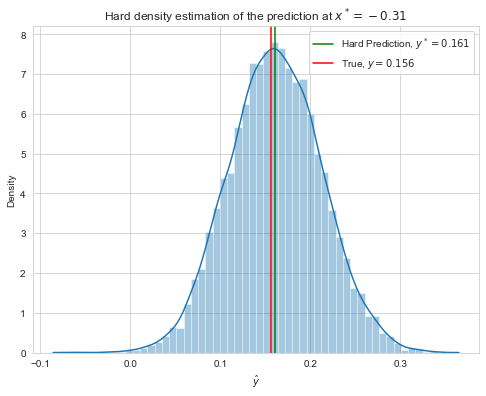

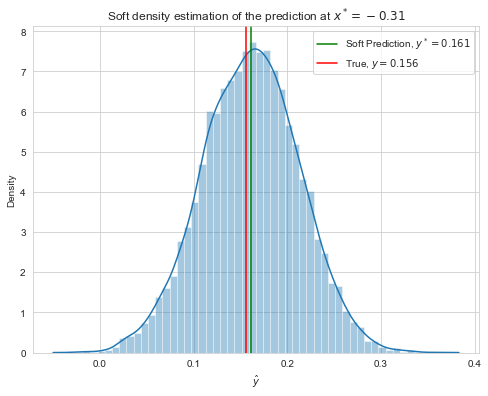

In [80]:
pnt = np.random.randint(low=0,high=X.shape[0])
m.estimate_density_hard(X[pnt],y=y[pnt])
m.estimate_density_soft(X[pnt],y=y[pnt])

### Bernholdt

In [81]:
# Import data, then scale and split into train/test
data = np.loadtxt('data/bernholdt.txt')
X = data[:,:-1]
if len(X.shape) == 1: X = X.reshape(-1,1)
y = data[:,-1].reshape(-1,1)

# We normalize both X and y with MinMaxScaler()
scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

# Randomly split into train (80%) and test (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [82]:
m = DeepMixtureGPE(n_experts=5, sparse_gp=False, fix_ind_pnts=True, random_state=11)

In [83]:
m.fit(X_train, y_train, mode='CCR', verbose=0)

Optimization restart 1/2, f = 515.3433252279824
Optimization restart 2/2, f = 515.3432783601597
Optimization restart 1/2, f = -359.44976608029447
Optimization restart 2/2, f = -359.4497660794034
Optimization restart 1/2, f = 877.0118197356663
Optimization restart 2/2, f = 877.0118196859185
Optimization restart 1/2, f = 862.8162930982123
Optimization restart 2/2, f = 862.816293083037
Optimization restart 1/2, f = 204.202703380239
Optimization restart 2/2, f = 204.2027033805077


In [84]:
m.scoring(X_test, y_test)


R^2. Hard_pred: 98.65 %. Soft_pred: 98.12 %.
RMSE. Hard_pred: 0.0728. Soft_pred: 0.0858.


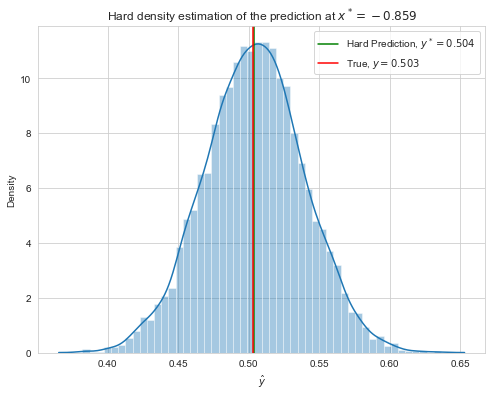

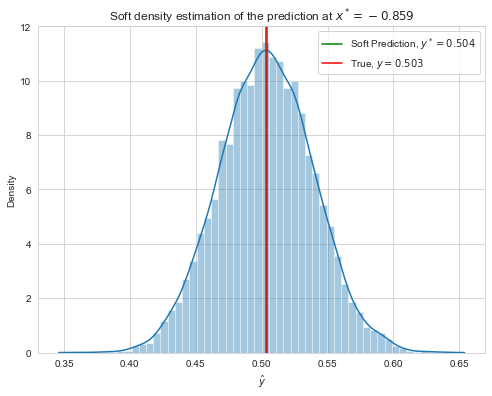

In [85]:
pnt = np.random.randint(low=0,high=X.shape[0])
m.estimate_density_hard(X[pnt],y=y[pnt])
m.estimate_density_soft(X[pnt],y=y[pnt])